In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.datasets import load_breast_cancer

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score before log transform: {:.3f}".format(score))

Test score before log transform: 0.585


In [4]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

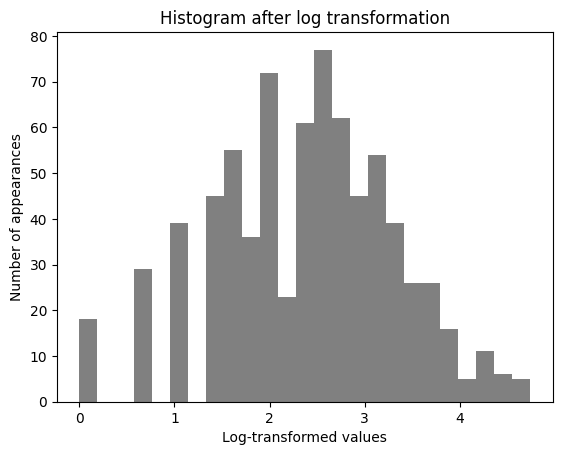

In [5]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Log-transformed values")
plt.title("Histogram after log transformation")
plt.show()

In [6]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score after log transform: {:.3f}".format(score))


Test score after log transform: 0.840


### Summary: Univariate Nonlinear Transformations
- Used Poisson-distributed synthetic count data.
- Ridge model performance was initially low due to skewed feature distributions.
- Applied log(X+1) transformation to handle skew and zero values.
- Ridge performance improved significantly post-transformation.
- Such transformations are especially useful for linear models, not tree-based models.
"""

In [7]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=0.5)


In [8]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [9]:
print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


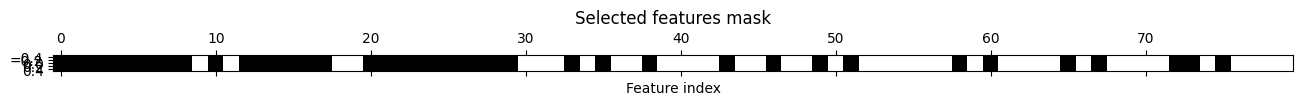

In [10]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature index")
plt.title("Selected features mask")
plt.show()

In [11]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))


Score with all features: 0.951
Score with selected features: 0.933


Summary: Automatic Feature Selection with Univariate Statistics
- Added 50 noise features to the cancer dataset.
- Used `SelectPercentile` with `f_classif` to retain top 50% relevant features.
- Visualized selected features using a binary mask.
- Logistic Regression performed slightly better using selected features.
- Univariate selection is fast and effective but ignores feature interactions.

### Model-Based Feature Selection using RandomForestClassifier
In this section, we apply model-based feature selection using `SelectFromModel` with a `RandomForestClassifier` to select the most important features. This approach considers feature interactions and overall model performance. We compare the dimensionality and model accuracy before and after selection.
"""


In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

In [15]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


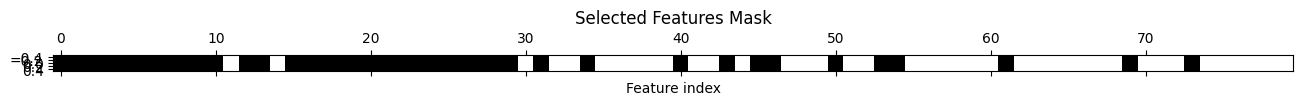

In [16]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature index")
plt.title("Selected Features Mask")
plt.show()


In [17]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))


Test score: 0.930


C:\Users\nsaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
